In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [3]:
from google.colab import files
uploaded = files.upload()


Saving US_category_id.json to US_category_id (1).json


In [4]:
# Load CSV file
nyc_df = pd.read_csv('AB_NYC_2019.csv')
print("✅ Airbnb Dataset Loaded")
print("Shape:", nyc_df.shape)
nyc_df.head()

# Load JSON file
with open('US_category_id.json', 'r') as file:
    youtube_data = json.load(file)

# Convert JSON to DataFrame
category_df = pd.json_normalize(youtube_data['items'])
print("\n✅ YouTube Categories Dataset Loaded")
print("Shape:", category_df.shape)
category_df.head()


✅ Airbnb Dataset Loaded
Shape: (48895, 16)

✅ YouTube Categories Dataset Loaded
Shape: (32, 6)


,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable
0,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKm...",1,UCBR8-60-B28hp2BmDPdntcQ,Film & Animation,True
1,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45Z...",2,UCBR8-60-B28hp2BmDPdntcQ,Autos & Vehicles,True
2,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxb...",10,UCBR8-60-B28hp2BmDPdntcQ,Music,True
3,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-o...",15,UCBR8-60-B28hp2BmDPdntcQ,Pets & Animals,True
4,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM...",17,UCBR8-60-B28hp2BmDPdntcQ,Sports,True


In [5]:
# Check missing values
print("\n--- Missing Values in Airbnb Dataset ---")
print(nyc_df.isnull().sum())

# Fill missing numeric values with mean
num_cols = nyc_df.select_dtypes(include=['float64', 'int64']).columns
nyc_df[num_cols] = nyc_df[num_cols].fillna(nyc_df[num_cols].mean())

# Fill missing categorical values with mode
cat_cols = nyc_df.select_dtypes(include=['object']).columns
nyc_df[cat_cols] = nyc_df[cat_cols].fillna(nyc_df[cat_cols].mode().iloc[0])

# Remove duplicates
nyc_df.drop_duplicates(inplace=True)

# Standardize column names
nyc_df.columns = nyc_df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\n✅ Airbnb Dataset Cleaned Successfully")
nyc_df.head()



--- Missing Values in Airbnb Dataset ---
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

✅ Airbnb Dataset Cleaned Successfully


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-06-23,1.373221,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


In [6]:
# Keep useful columns only
category_df = category_df[['id', 'snippet.title', 'snippet.assignable']]

# Rename columns
category_df.columns = ['category_id', 'title', 'assignable']

# Remove duplicates (if any)
category_df.drop_duplicates(inplace=True)

print("\n✅ YouTube Categories Cleaned Successfully")
category_df.head()



✅ YouTube Categories Cleaned Successfully


,category_id,title,assignable
0,1,Film & Animation,True
1,2,Autos & Vehicles,True
2,10,Music,True
3,15,Pets & Animals,True
4,17,Sports,True


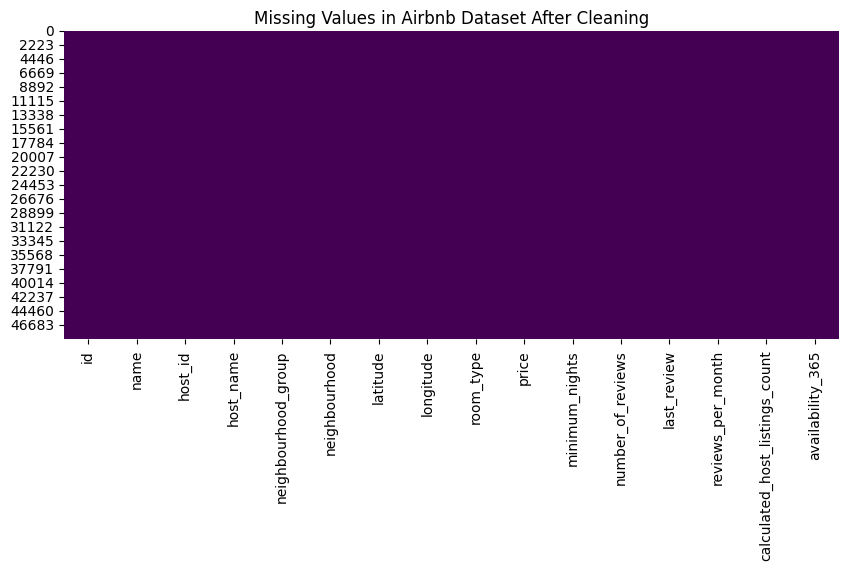

In [7]:
plt.figure(figsize=(10,4))
sns.heatmap(nyc_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values in Airbnb Dataset After Cleaning")
plt.show()


In [8]:
for col in nyc_df.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = nyc_df[col].quantile(0.25)
    Q3 = nyc_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    nyc_df = nyc_df[(nyc_df[col] >= lower) & (nyc_df[col] <= upper)]

print("\n✅ Outliers removed from Airbnb dataset")



✅ Outliers removed from Airbnb dataset


In [9]:
nyc_df.to_csv('cleaned_AB_NYC_2019.csv', index=False)
category_df.to_csv('cleaned_US_category_id.csv', index=False)
print("✅ Both Cleaned Datasets Saved Successfully!")


✅ Both Cleaned Datasets Saved Successfully!


In [10]:
print("Cleaned Airbnb Dataset Shape:", nyc_df.shape)
print("Cleaned YouTube Dataset Shape:", category_df.shape)


Cleaned Airbnb Dataset Shape: (23268, 16)
Cleaned YouTube Dataset Shape: (32, 3)
